In [1]:
import tensorflow as tf

In [4]:
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

In [7]:
data = keras.datasets.fashion_mnist

In [8]:
(train_images, train_labels), (test_images, test_labels) = data.load_data()

4423680/4422102 [==============================] - 13s 3us/step


In [11]:
print(len(train_images), len(test_images))
print(train_images.shape)

60000 10000
(60000, 28, 28)


In [12]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

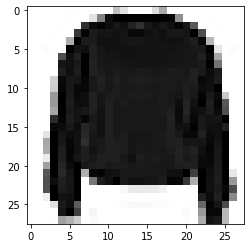

In [14]:
plt.imshow(train_images[7], cmap=plt.cm.binary)
plt.show()

In [15]:
train_images = train_images/255.0
test_images = test_images/255.0

### Creating our model

In [18]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

In [20]:
model.compile(optimizer="adam",
             loss="sparse_categorical_crossentropy",
             metrics=["accuracy"])

In [21]:
model.fit(train_images, train_labels, epochs=5)

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 13s 210us/sample - loss: 0.5011 - accuracy: 0.8240
Epoch 2/5
60000/60000 [==============================] - 7s 112us/sample - loss: 0.3730 - accuracy: 0.8655
Epoch 3/5
60000/60000 [==============================] - 7s 121us/sample - loss: 0.3316 - accuracy: 0.8804
Epoch 4/5
60000/60000 [==============================] - 7s 113us/sample - loss: 0.3092 - accuracy: 0.8866
Epoch 5/5
60000/60000 [==============================] - 8s 127us/sample - loss: 0.2915 - accuracy: 0.8921


In [23]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(test_loss, test_acc)

10000/10000 [==============================] - 1s 76us/sample - loss: 0.3363 - accuracy: 0.8773
0.3362854619860649 0.8773


In [29]:
import tensorflow as tf

class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('accuracy')>0.91):
            print("\nReached 60% accuracy so cancelling training!")
            self.model.stop_training = True

mnist = tf.keras.datasets.fashion_mnist

(x_train, y_train),(x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

callbacks = myCallback()

model = keras.Sequential([
  keras.layers.Flatten(input_shape=(28, 28)),
  keras.layers.Dense(128, activation='relu'),
  keras.layers.Dense(10, activation='softmax')
])
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=10, callbacks=[callbacks])

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 10s 159us/sample - loss: 0.5005 - accuracy: 0.8246
Epoch 2/10
60000/60000 [==============================] - 7s 118us/sample - loss: 0.3747 - accuracy: 0.8647
Epoch 3/10
60000/60000 [==============================] - 7s 111us/sample - loss: 0.3378 - accuracy: 0.8766
Epoch 4/10
60000/60000 [==============================] - 6s 105us/sample - loss: 0.3149 - accuracy: 0.8847
Epoch 5/10
60000/60000 [==============================] - 6s 105us/sample - loss: 0.2971 - accuracy: 0.8899
Epoch 6/10
60000/60000 [==============================] - 8s 130us/sample - loss: 0.2828 - accuracy: 0.8947
Epoch 7/10
60000/60000 [==============================] - 7s 121us/sample - loss: 0.2696 - accuracy: 0.9004
Epoch 8/10
60000/60000 [==============================] - 8s 134us/sample - loss: 0.2594 - accuracy: 0.9036
Epoch 9/10
60000/60000 [==============================] - 14s 231us/sample - loss: 0.2485 - accuracy: 0.9074
Epo

In [33]:
prediction = model.predict(test_images)
print(prediction[0])

[1.9118195e-06 1.9773709e-09 2.0283530e-08 2.8245926e-09 1.2464430e-07
 9.0190321e-03 9.9849183e-07 1.2579598e-03 2.8665931e-07 9.8971975e-01]


In [34]:
prediction = model.predict(test_images)
print(np.argmax(prediction[0]))

9


In [35]:
prediction = model.predict(test_images)
print(class_names[np.argmax(prediction[0])])

Ankle boot


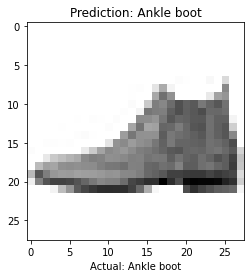

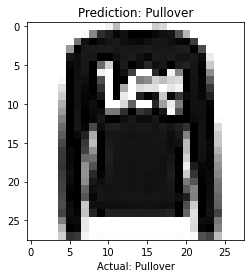

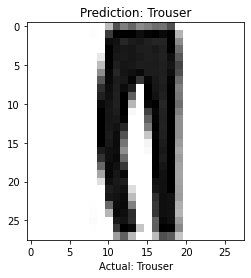

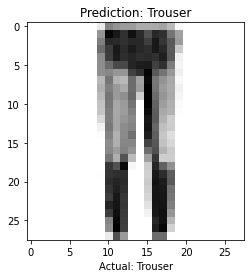

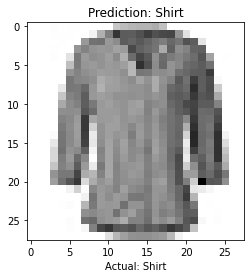

In [36]:
for i in range(5):
    plt.grid(False)
    plt.imshow(test_images[i], cmap=plt.cm.binary)
    plt.xlabel("Actual: " + class_names[test_labels[i]])
    plt.title("Prediction: " + class_names[np.argmax(prediction[i])])
    plt.show()